# Practice Case Machine Learning

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# https://stackoverflow.com/questions/52861571/pandas-read-csv-load-data-with-irregular-rows

import io

def add_delimiters(fpath, delimiter=','):

    s_data = ''
    max_num_delimiters = 0

    with open(fpath, 'r') as f:
        for line in f:
            s_data += line
            delimiter_count = line.count(delimiter)
            if delimiter_count > max_num_delimiters:
                max_num_delimiters = delimiter_count

    s_delimiters = delimiter * max_num_delimiters + '\n'

    return io.StringIO(s_delimiters + s_data)

In [5]:
data = pd.read_csv(add_delimiters('ML_2_Fellow.csv'), quoting=3)

## DATA CLEANING

In [4]:
data.columns = ["Kode_Bayar", "Kode_Barang", "Barang", "Jumlah", "Tanggal_Transaksi", "Harga_Satuan", "Kode_Pelanggan", "Negara", "1", "2"]

In [5]:
data = data.drop(0)

In [6]:
dataplus2 = data[data["2"].isna() == False]
dataplus2index = dataplus2.index

In [7]:
# join on clean data

data_clean = data.drop(dataplus2index)

In [8]:
dataplus1 = data_clean[data_clean["1"].isna() == False]
dataplus1index = dataplus1.index

In [9]:
data_clean = data_clean.drop(dataplus1index)

In [10]:
#Data cleaning
dataplus1.Kode_Bayar = dataplus1.Kode_Bayar.map(lambda x: x.lstrip('"'))
dataplus1.Barang = dataplus1.Barang.map(str).map(lambda x: x.lstrip('"'))+ ", " + dataplus1.Jumlah.map(str).map(lambda x: x.rstrip('"'))
dataplus1.Jumlah = dataplus1.Tanggal_Transaksi
dataplus1.Tanggal_Transaksi = dataplus1.Harga_Satuan
dataplus1.Harga_Satuan = dataplus1.Kode_Pelanggan
dataplus1.Kode_Pelanggan = dataplus1.Negara
dataplus1.Negara = dataplus1["1"].map(lambda x: x.rstrip('"'))

In [11]:
#Data cleaning
dataplus2.Kode_Bayar = dataplus2.Kode_Bayar.map(lambda x: x.lstrip('"'))
dataplus2.Barang = dataplus2.Barang.map(str).map(lambda x: x.lstrip('"')) + ", " + dataplus2.Jumlah.map(str).map(lambda x: x.lstrip(' ')) + ", " + dataplus2.Tanggal_Transaksi.map(str).map(lambda x: x.rstrip('"'))
dataplus2.Jumlah = dataplus2.Harga_Satuan
dataplus2.Tanggal_Transaksi = dataplus2.Kode_Pelanggan
dataplus2.Harga_Satuan = dataplus2.Negara
dataplus2.Kode_Pelanggan = dataplus2["1"]
dataplus2.Negara = dataplus2["2"].map(lambda x: x.rstrip('"'))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
data_clean.Negara = data_clean.Negara.map(lambda x: x.rstrip('"'))

In [13]:
data_clean = data_clean.append(dataplus2)
data_clean = data_clean.append(dataplus1)

In [16]:
data_clean.Negara.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [17]:
data_clean = data_clean.drop(columns=['1', '2'])

In [636]:
data_clean

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541022,581492,22819,"BIRTHDAY CARD, RETRO SPOT",3,12/9/2011 10:03,0.42,NaN,United Kingdom
541202,581494,21506,"FANCY FONT BIRTHDAY CARD,",12,12/9/2011 10:13,0.42,12518,Germany
541550,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
541615,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom


In [18]:
data_clean = data_clean[data_clean['Barang'].str.isupper().fillna(False)].reset_index(drop=True)

## EDA

In [638]:
len(data_clean)

537363

In [639]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537363 entries, 0 to 537362
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Kode_Bayar         537363 non-null  object
 1   Kode_Barang        537363 non-null  object
 2   Barang             537363 non-null  object
 3   Jumlah             537363 non-null  object
 4   Tanggal_Transaksi  537363 non-null  object
 5   Harga_Satuan       537363 non-null  object
 6   Kode_Pelanggan     404875 non-null  object
 7   Negara             537363 non-null  object
dtypes: object(8)
memory usage: 32.8+ MB


In [19]:
data_process = data_clean.convert_dtypes()

In [20]:
data_process = data_clean.astype({"Jumlah": int, "Harga_Satuan": float})

In [21]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537363 entries, 0 to 537362
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         537363 non-null  object 
 1   Kode_Barang        537363 non-null  object 
 2   Barang             537363 non-null  object 
 3   Jumlah             537363 non-null  int32  
 4   Tanggal_Transaksi  537363 non-null  object 
 5   Harga_Satuan       537363 non-null  float64
 6   Kode_Pelanggan     404875 non-null  object 
 7   Negara             537363 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 30.7+ MB


### 1. What items customers buy the most and are there any items we should ignore?

In [22]:
data_q1 = data_process[['Barang', 'Jumlah']]
data_q1_result = data_q1.groupby('Barang').sum().sort_values("Jumlah")

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_q1_result)

                                              Jumlah
Barang                                              
POSSIBLE DAMAGES OR LOST?                       -750
MERCHANT CHANDLER CREDIT ERROR,  STO            -576
WET/MOULDY                                      -192
MIA                                             -154
CHECK                                           -134
SAMPLES                                          -59
AMAZON FEE                                       -30
ASSORTED TUTTI FRUTTI ROUND BOX                  -24
WHITE CHERRY LIGHTS                               -8
PINK POODLE HANGING DECORATION                    -7
BLUE PADDED SOFT MOBILE                           -6
VINTAGE GOLD TINSEL REEL                          -6
WOODEN BOX ADVENT CALENDAR                        -6
PINK CHERRY LIGHTS                                -4
CREAM SWEETHEART MAGAZINE RACK                    -3
ANTIQUE LILY FAIRY LIGHTS                         -3
PINK SMALL GLASS CAKE STAND                   

In [24]:
# Top 5 items customer buy the most
data_q1.groupby('Barang').sum().sort_values("Jumlah", ascending=False).head(5)

,Jumlah
Barang,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [25]:
# Some items we should ignore (Jumlah = 0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_q1_result[(data_q1_result == 0).all(1)].tail(5))

                                     Jumlah
Barang                                     
HANGING RIDGE GLASS T-LIGHT HOLDER        0
WHITE BEADED GARLAND STRING 20LIGHT       0
PAPER CRAFT ,  LITTLE BIRDIE              0
GLASS CAKE COVER AND PLATE                0
BLACK CHERRY LIGHTS                       0


### 2. What is our strategy to increase sales based on our export destination countries?

In [26]:
data_q2 = data_process[['Barang', 'Negara', 'Jumlah', 'Harga_Satuan']]
data_q2_result = data_q2.groupby(['Barang', 'Negara']).sum().sort_values("Jumlah")

In [27]:
# Strategy 1: Focus on most profitable country based on sales (Jumlah * Harga Satuan)
sales = pd.DataFrame(data_process.Jumlah * data_process.Harga_Satuan)
sales

data_q2 = data_process.join(sales)
data_q2 = data_q2.rename(columns={0:"Sales"})

In [28]:
data_q2_s1 = data_q2[['Barang', 'Negara', 'Sales']]

In [29]:
pd.options.display.float_format = '{:.2f}'.format

In [30]:
data_q2_s1.groupby("Negara").agg('sum').sort_values("Sales", ascending=False).head(5)

,Sales
Negara,
United Kingdom,8265431.70
Netherlands,284973.54
EIRE,264470.36
Germany,221536.28
France,197237.40


### 3. Do customer segmentation appropriately. Please explain in detail and completely

In [2]:
data_temp = data_process.copy()
data_q3 = data_process[['Jumlah', 'Harga_Satuan', 'Sales']]

NameError: name 'data_process' is not defined

In [39]:
data_q3

,Jumlah,Harga_Satuan
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
537358,3,0.42
537359,12,0.42
537360,12,3.95
537361,24,1.25


#### KMeans Clustering

In [68]:
kmeans = KMeans(n_clusters=3)

In [69]:
kmeans.fit(data_q3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
kmeans.cluster_centers_

array([[ 9.85414779e+00,  4.22421090e+00,  2.15709646e-17],
       [ 7.76050000e+04,  1.56000000e+00,  0.00000000e+00],
       [-7.76050000e+04,  1.56000000e+00,  1.00000000e+00]])

In [71]:
kmeans.n_iter_

2

In [72]:
np.unique(kmeans.labels_[:35])

array([0])

In [73]:
data_q3['cluster'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
data_q3.head()

,Jumlah,Harga_Satuan,cluster
0,6,2.55,0
1,6,3.39,0
2,8,2.75,0
3,6,3.39,0
4,6,3.39,0


In [75]:
print(davies_bouldin_score(data_q3, kmeans.labels_)) 

0.04384565807720226


In [65]:
# Elbow Method
# https://predictivehacks.com/k-means-elbow-method-code-for-python/

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_q3)
    distortions.append(kmeanModel.inertia_)

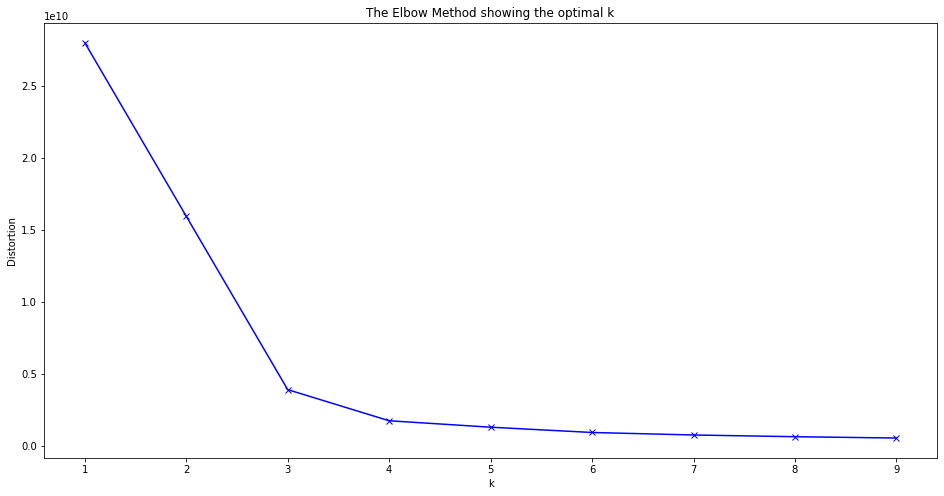

In [67]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 4. Get the hidden insight from the data